# Лабораторная работа №4

ФИО:   
Группа: 

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Пример импорта данных. Грузим данные

In [434]:
import pandas
data = pandas.read_csv("apple_quality.csv")
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


## 2. Понимаем, какая перед нами задача

Задача классификации(бинарная)

## 3. Делаем предобработку данных

X_train_scaled shape: (3200, 7)
X_test_scaled shape: (800, 7)
X_train_minmax shape: (3200, 7)
X_test_minmax shape: (800, 7)


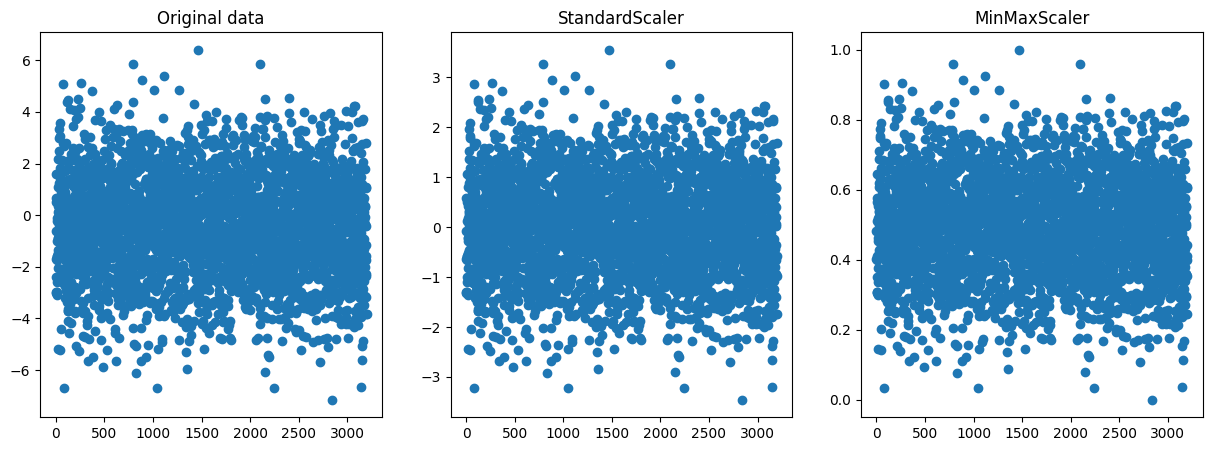

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, QuantileTransformer
import matplotlib.pyplot as plt
data = pandas.read_csv("apple_quality.csv")
target_variable = 'Quality'
data = data.drop(columns=['A_id'])

x = data.drop(columns=[target_variable])
y = data[target_variable].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, Y_train, Y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)


print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("X_train_minmax shape:", X_train_minmax.shape)
print("X_test_minmax shape:", X_test_minmax.shape)

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].scatter(range(len(X_train_scaled)), X_train['Size'])
axes[0].set_title("Original data")

axes[1].scatter(range(len(X_train_scaled)), X_train_scaled[:, 0])
axes[1].set_title("StandardScaler")

axes[2].scatter(range(len(X_train_scaled)), X_train_minmax[:, 0])
axes[2].set_title("MinMaxScaler")

plt.show()
X_train = X_train_scaled
X_test = X_test_scaled


## 4. Оформить данные в виде класса Dataset


In [436]:
import torch
from torch.utils.data import Dataset

class QualityDataset(Dataset):
    def __init__(self, X, y):
        self.x = torch.tensor(X, dtype = torch.float64)
        self.y = torch.tensor(y).view(-1, 1)
        self.n_samples = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples
    
train = QualityDataset(X_train, Y_train)

test =  QualityDataset(X_test, Y_test)

X_sample, Y_sample = train[0]

In [437]:
print(X_sample)
print(X_sample.shape)

tensor([-0.6404,  0.0106,  1.1255,  0.9726, -0.8549,  0.5228,  1.2379],
       dtype=torch.float64)
torch.Size([7])


In [438]:
print(Y_sample)
print(Y_sample.shape)

tensor([0])
torch.Size([1])


In [439]:
train.n_samples

3200

## 4. Даталоадеры 

In [440]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

train_dataloader_x, train_dataloader_y = next(iter(train_dataloader))
print(f"Размерность батча признаков: {train_dataloader_x.size()}")
print(f"Размерность батча целевой: {train_dataloader_y.size()}")

Размерность батча признаков: torch.Size([64, 7])
Размерность батча целевой: torch.Size([64, 1])


## 5. Обучить на тренировочном множестве

In [441]:
from torch import nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

simple_model = nn.Sequential(
    nn.Linear(X_train.shape[1], 1),
    nn.Sigmoid() 
).to(device).double()

hidden_model = nn.Sequential(
    nn.Linear(X_train.shape[1], 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
).to(device).double()

complex_model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 1),
    nn.Sigmoid()
).to(device).double()

In [442]:
learning_rate = 1e-4
epochs = 100
loss_fn = nn.BCELoss()
optimizer_simple = torch.optim.SGD(simple_model.parameters(), lr=1e-2)
optimizer_hidden = torch.optim.Adam(hidden_model.parameters(), lr=learning_rate, weight_decay=1e-7)
optimizer_complex = torch.optim.Adam(complex_model.parameters(), lr=learning_rate, weight_decay=1e-7)

In [443]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    total_loss = 0.0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device, dtype=torch.float64), y.to(device, dtype=torch.float64)
        pred = model(X)
        loss = loss_fn(pred, y)

        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]") 

    avg_train_loss = total_loss / len(dataloader)
    return avg_train_loss


In [444]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0.0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device, dtype=torch.float64), y.to(device, dtype=torch.float64)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.round() == y).type(torch.float).sum().item()

    avg_test_loss = test_loss / num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {avg_test_loss:>8f} \n")

    return avg_test_loss


## 6. Посчитайте loss на train и test множествах, посчитать метрики - Accuracy.

In [445]:
import matplotlib.pyplot as plt

def plot_loss(train_losses, test_losses, epochs):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs+1), train_losses, label="Train Loss", color='blue')
    plt.plot(range(1, epochs+1), test_losses, label="Test Loss", color='red')
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Test Loss over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()



In [446]:
def run_epohs(epochs, model, optimizer):
    train_losses = []
    test_losses = []    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        
        train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        
        test_loss = test_loop(test_dataloader, model, loss_fn)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
    
    return train_losses, test_losses


Epoch 1
-------------------------------
loss: 0.903262  [    0/ 3200]
Test Error: 
 Accuracy: 37.8%, Avg loss: 0.814770 

Epoch 2
-------------------------------
loss: 0.752689  [    0/ 3200]
Test Error: 
 Accuracy: 41.9%, Avg loss: 0.759658 

Epoch 3
-------------------------------
loss: 0.767702  [    0/ 3200]
Test Error: 
 Accuracy: 47.2%, Avg loss: 0.718588 

Epoch 4
-------------------------------
loss: 0.756773  [    0/ 3200]
Test Error: 
 Accuracy: 55.1%, Avg loss: 0.687394 

Epoch 5
-------------------------------
loss: 0.676389  [    0/ 3200]
Test Error: 
 Accuracy: 64.6%, Avg loss: 0.661188 

Epoch 6
-------------------------------
loss: 0.678374  [    0/ 3200]
Test Error: 
 Accuracy: 68.5%, Avg loss: 0.639590 

Epoch 7
-------------------------------
loss: 0.667701  [    0/ 3200]
Test Error: 
 Accuracy: 70.4%, Avg loss: 0.625212 

Epoch 8
-------------------------------
loss: 0.656987  [    0/ 3200]
Test Error: 
 Accuracy: 71.2%, Avg loss: 0.610527 

Epoch 9
----------------

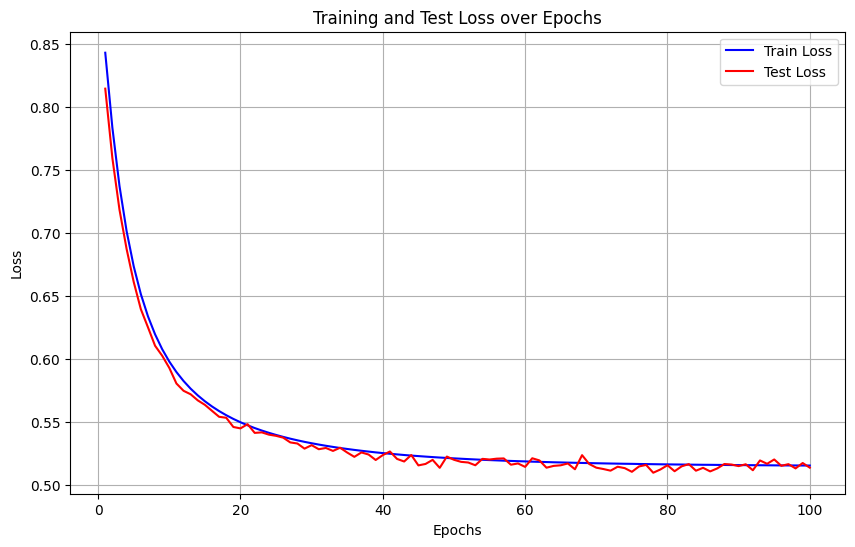

Простая
Тренировочная [0.8433245840761358, 0.7838115012373816, 0.737480388093173, 0.7015991121408315, 0.6736033347616903, 0.651554093168697, 0.6339344985847252, 0.6196132110431489, 0.6077967396884726, 0.5979618995036431, 0.5896454433753425, 0.5825439226260655, 0.5764088364714257, 0.5710986248860976, 0.566425514160932, 0.5622941232721042, 0.5586217238019632, 0.5553477964310417, 0.5524017351555094, 0.5497413066702986, 0.5473382462617998, 0.5451408375644915, 0.5431632924384491, 0.5413483270304558, 0.5396689606266969, 0.5381374979618583, 0.5367061329986668, 0.5354022705213243, 0.5341836586576664, 0.5330671463570349, 0.53202723166165, 0.5310687627372385, 0.5301623067139236, 0.5292987865603636, 0.5285237476216127, 0.5277841226617649, 0.5270896948716122, 0.5264505885106958, 0.5258213389661903, 0.5252533432696367, 0.5247342768214686, 0.5242234712064885, 0.5237285485463807, 0.5232798871880338, 0.5228652972994348, 0.5224635347610354, 0.5220802872884404, 0.5217142062310924, 0.5213820694994928, 0.

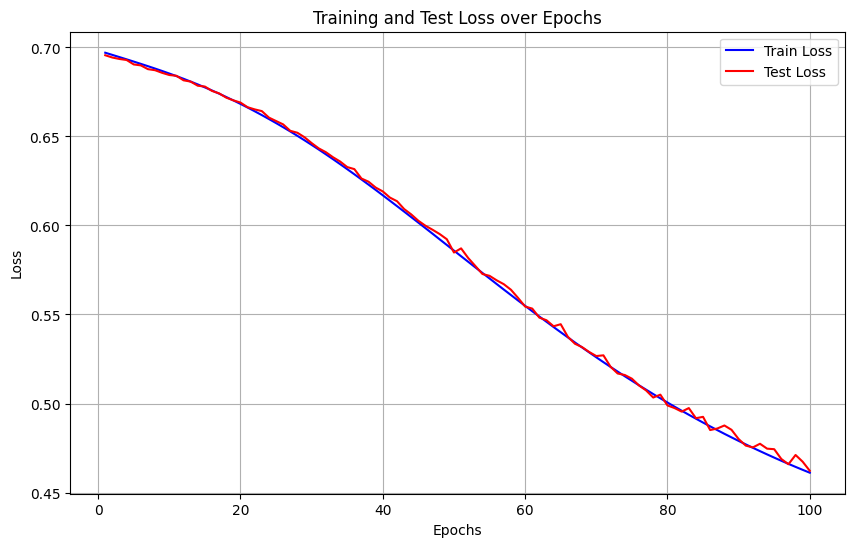

С скрытым слоем
Тренировочная [0.6970182577673928, 0.6957931040703039, 0.6945564984976081, 0.6933075111771565, 0.6920434787257349, 0.6907606337918001, 0.689457329767756, 0.6881182176070841, 0.6867525628593582, 0.6853330865929425, 0.683892393880228, 0.6823905897833591, 0.6808144396972007, 0.6792178517520213, 0.6775406570099493, 0.6758115412530264, 0.6740226176351304, 0.6721502801956812, 0.6702320826103992, 0.6682671427536762, 0.6662367366695164, 0.6641398660856411, 0.6619814400036033, 0.6597719201946819, 0.6575090039087652, 0.6551801577128341, 0.6527902820509608, 0.6503339143897723, 0.6478277142608238, 0.6452573767541687, 0.6426410563678597, 0.6399559291879318, 0.6372369077551053, 0.6344480851379484, 0.6316202733451022, 0.6287579499214045, 0.6258546812441014, 0.6229183309912751, 0.6199590572575111, 0.6169405533176484, 0.613901519508094, 0.6108519527112068, 0.6077786193433163, 0.6046747798956743, 0.6015776220678285, 0.5984636157929095, 0.595338632235842, 0.5921710713699151, 0.58903240792

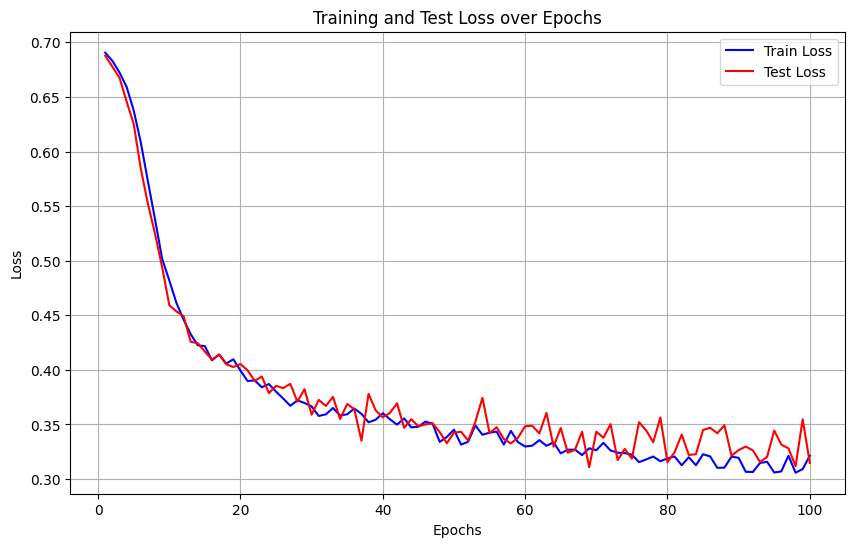

Сложная
Тренировочная [0.690512680980546, 0.6830134830231779, 0.6724635448002287, 0.6592067867755991, 0.6375639716971225, 0.6081669176729156, 0.5724799949083986, 0.5376868689400527, 0.5016081263080648, 0.4819166579978539, 0.4613572612850571, 0.4461143578755843, 0.43279573137362026, 0.42253087764166836, 0.4217141393594128, 0.40874660357788867, 0.4141012900142856, 0.40582248006234456, 0.4097040068629305, 0.3993507903147514, 0.3897817479014792, 0.3903607972616308, 0.38408859673402346, 0.3870498069652117, 0.3800022955822211, 0.373793325223597, 0.3671064740546593, 0.3720767526103096, 0.36968796977779644, 0.3665146971795654, 0.357807183955358, 0.35926695444167167, 0.36506908903706015, 0.3582021621083244, 0.35935779584969185, 0.3645865385660598, 0.3597347919559026, 0.35198806001433774, 0.35434016550765407, 0.3603162650880504, 0.3547623788938587, 0.34983366556212664, 0.3555801335432537, 0.3473507384358016, 0.34793762063636713, 0.3526267338223499, 0.350628454059198, 0.3340261844398932, 0.338569

In [447]:
train_losses, test_losses = run_epohs(epochs, simple_model, optimizer_simple)
plot_loss(train_losses, test_losses, epochs)

print("Простая")
print("Тренировочная", train_losses)
print("Тестовый", test_losses)

train_losses, test_losses = run_epohs(epochs, hidden_model, optimizer_hidden)
plot_loss(train_losses, test_losses, epochs)

print("С скрытым слоем")
print("Тренировочная", train_losses)
print("Тестовый", test_losses)

train_losses, test_losses = run_epohs(epochs, complex_model, optimizer_complex)
plot_loss(train_losses, test_losses, epochs)

print("Сложная")
print("Тренировочная", train_losses)
print("Тестовый", test_losses)



## 8 Сравните метрики относительно train/test, так и относительно разных моделей

Какая модель справилась лучше с поставленной задачей?

Hidden модель показала наилучший результат, так как она достигает высокой accuracy на тесте при относительно низком loss.

Имеет ли место переобучение?
Переобучение наблюдается у сложной модели, accuracy на обучении значительно выше, чем на тесте, а loss на тесте выше, чем на обучении.

Имеет ли место недообучение?
Недообучение есть у простой модели, так как её accuracy и на обучении, и на тесте низкое, а loss высок.

Как можно улучшить метрики моделей?
Для сложной модели уменьшить переобучение можно с помощью регуляризации или dropout; для простой — усложнить архитектуру и увеличить число эпох